In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [3]:
model = tf.keras.models.Sequential()

model.add( tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


model.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(units=256, activation='relu' ))
model.add( tf.keras.layers.Dense(units=128, activation='relu' ))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # for CNN_classification output

model.add( Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear')) #for_svm_classifier




In [4]:

model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

r = model.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data =(X_test, y_test))

Epoch 1/50
36/36 [==============================] - 16s 446ms/step - loss: 0.6458 - accuracy: 0.5639 - val_loss: 0.3754 - val_accuracy: 0.6117
Epoch 2/50
36/36 [==============================] - 15s 421ms/step - loss: 0.2749 - accuracy: 0.8801 - val_loss: 0.2529 - val_accuracy: 0.9094
Epoch 3/50
36/36 [==============================] - 15s 425ms/step - loss: 0.2118 - accuracy: 0.9157 - val_loss: 0.2119 - val_accuracy: 0.9320
Epoch 4/50
36/36 [==============================] - 15s 416ms/step - loss: 0.1531 - accuracy: 0.9331 - val_loss: 0.1541 - val_accuracy: 0.9320
Epoch 5/50
36/36 [==============================] - 15s 422ms/step - loss: 0.1171 - accuracy: 0.9461 - val_loss: 0.3134 - val_accuracy: 0.8900
Epoch 6/50
36/36 [==============================] - 15s 410ms/step - loss: 0.0779 - accuracy: 0.9679 - val_loss: 0.1673 - val_accuracy: 0.9515
Epoch 7/50
36/36 [==============================] - 15s 419ms/step - loss: 0.0809 - accuracy: 0.9626 - val_loss: 0.1481 - val_accuracy: 0.9482

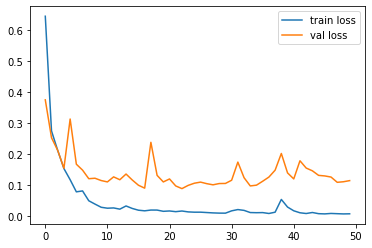

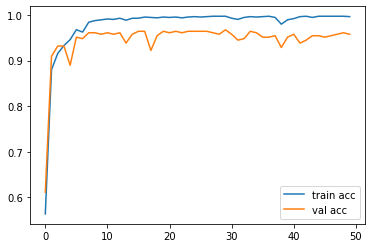

In [5]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [8]:
model.save('CNN+SVM_FOR_CYCLONE_DETECTION.h5')

In [6]:
from keras.models import load_model
model1 = load_model('CNN+SVM_FOR_CYCLONE_DETECTION.h5')

In [7]:
#_, acc = model.evaluate(X_test, y_test)
#print("Accuracy = ", (acc * 100.0), "%")

In [8]:
mythreshold = 0.5

from sklearn.metrics import confusion_matrix, classification_report

y_pred1 = (model1.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred1)

print(cm)

print(classification_report(y_test,y_pred1))


[[183   5]
 [ 13 108]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       188
           1       0.96      0.89      0.92       121

    accuracy                           0.94       309
   macro avg       0.94      0.93      0.94       309
weighted avg       0.94      0.94      0.94       309



In [10]:
model2 = load_model('CNN_FOR_CYCLONE_DETECTION.h5')

y_pred2 = (model2.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred2)  
print(cm)

print(classification_report(y_test,y_pred2))

[[183   5]
 [ 10 111]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       188
           1       0.96      0.92      0.94       121

    accuracy                           0.95       309
   macro avg       0.95      0.95      0.95       309
weighted avg       0.95      0.95      0.95       309



In [11]:
model3 = load_model('ANN_FOR_CYCLONE_DETECTION.h5')
y_pred3 = (model3.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred3)  
print(cm)

print(classification_report(y_test,y_pred3))

[[166  22]
 [ 13 108]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       188
           1       0.83      0.89      0.86       121

    accuracy                           0.89       309
   macro avg       0.88      0.89      0.88       309
weighted avg       0.89      0.89      0.89       309

